In [21]:
# 1. Missing value treatment (see screenshot for treatment)
# 2. Outliers treatment
# a.remove the outliers
# b.transform the data
# (square root, cube root and log transformation)
# 3. Feature scaling
# standardisation(commonly used)
# normalisation(rarely used)

In [ ]:
# label encoding
# One hot encoding

In [20]:
import os
os.getcwd()
os.chdir('C:\\Users\\Shailesh\\PycharmProjects\\DataScience-With-Python\\Edureka\\Edureka-17082019-DSPY\\DataSources')

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
dataset = pd.read_excel('Employee_Data.xls')

In [23]:
dataset.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Camden,Savage,Asset Management,38.0,23.0,46975
1,2,Justina,Mcconnell,Customer Service,26.0,10.0,30711
2,3,Stewart,Moon,Human Resources,NaN,14.0,25049
3,4,Tobias,Fletcher,Public Relations,NaN,12.0,33309
4,5,Raja,Sims,Customer Service,NaN,13.0,25274


In [4]:
dataset.isnull().sum()   # to show all the colums

Employee Id     0
First Name      0
Last Name       0
Department      9
Age             6
Experience     13
Salary          0
dtype: int64

In [5]:
dataset.head(30)

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Camden,Savage,Asset Management,38.0,23.0,46975
1,2,Justina,Mcconnell,Customer Service,26.0,10.0,30711
2,3,Stewart,Moon,Human Resources,NaN,14.0,25049
3,4,Tobias,Fletcher,Public Relations,NaN,12.0,33309
4,5,Raja,Sims,Customer Service,NaN,13.0,25274
5,6,Kirsten,Douglas,Advertising,NaN,9.0,48583
6,7,Kylee,Lindsay,Research and Development,NaN,24.0,39697
7,8,Deborah,Price,Asset Management,NaN,2.0,24163
8,9,Imogene,Ochoa,Legal Department,40.0,30.0,17160
9,10,Justin,Keith,Advertising,24.0,23.0,35218


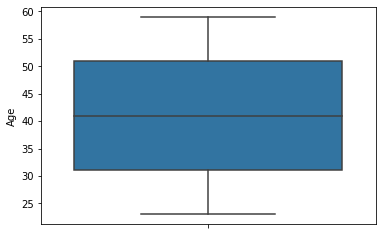

In [24]:
import seaborn as sns
sns.boxplot(y='Age', data=dataset)  # to find the outliers both mean and median could be used with no outliers and median in other case

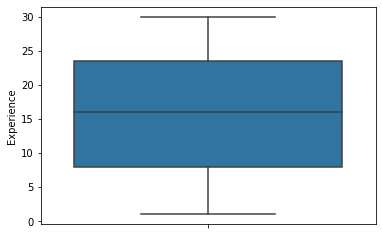

In [7]:
sns.boxplot(y='Experience', data=dataset) # to find the outliers

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
Employee Id    100 non-null int64
First Name     100 non-null object
Last Name      100 non-null object
Department     91 non-null object
Age            94 non-null float64
Experience     87 non-null float64
Salary         100 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 5.5+ KB


In [8]:
x=dataset.iloc[:,3:6].values  # index location

In [9]:
x

array([['Asset Management', 38.0, 23.0],
       ['Customer Service', 26.0, 10.0],
       ['Human Resources', nan, 14.0],
       ['Public Relations', nan, 12.0],
       ['Customer Service', nan, 13.0],
       ['Advertising', nan, 9.0],
       ['Research and Development', nan, 24.0],
       ['Asset Management', nan, 2.0],
       ['Legal Department', 40.0, 30.0],
       ['Advertising', 24.0, 23.0],
       ['Legal Department', 35.0, 3.0],
       [nan, 31.0, nan],
       [nan, 58.0, nan],
       [nan, 51.0, nan],
       [nan, 27.0, nan],
       [nan, 54.0, nan],
       [nan, 55.0, nan],
       ['Media Relations', 58.0, nan],
       ['Research and Development', 59.0, nan],
       ['Media Relations', 45.0, 4.0],
       ['Sales and Marketing', 50.0, 2.0],
       ['Advertising', 55.0, 19.0],
       ['Tech Support', 40.0, 20.0],
       ['Advertising', 51.0, 21.0],
       ['Media Relations', 24.0, 12.0],
       ['Asset Management', 57.0, 25.0],
       ['Legal Department', 24.0, 9.0],
       ['Pub

In [10]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy='mean', axis=0)
imputer = imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])

C:\Users\Shailesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
x

array([['Asset Management', 38.0, 23.0],
       ['Customer Service', 26.0, 10.0],
       ['Human Resources', 40.93617021276596, 14.0],
       ['Public Relations', 40.93617021276596, 12.0],
       ['Customer Service', 40.93617021276596, 13.0],
       ['Advertising', 40.93617021276596, 9.0],
       ['Research and Development', 40.93617021276596, 24.0],
       ['Asset Management', 40.93617021276596, 2.0],
       ['Legal Department', 40.0, 30.0],
       ['Advertising', 24.0, 23.0],
       ['Legal Department', 35.0, 3.0],
       [nan, 31.0, 15.781609195402298],
       [nan, 58.0, 15.781609195402298],
       [nan, 51.0, 15.781609195402298],
       [nan, 27.0, 15.781609195402298],
       [nan, 54.0, 15.781609195402298],
       [nan, 55.0, 15.781609195402298],
       ['Media Relations', 58.0, 15.781609195402298],
       ['Research and Development', 59.0, 15.781609195402298],
       ['Media Relations', 45.0, 4.0],
       ['Sales and Marketing', 50.0, 2.0],
       ['Advertising', 55.0, 19.0],
  

In [12]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy='median', axis=0)
imputer = imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])

C:\Users\Shailesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
x

array([['Asset Management', 38.0, 23.0],
       ['Customer Service', 26.0, 10.0],
       ['Human Resources', 40.93617021276596, 14.0],
       ['Public Relations', 40.93617021276596, 12.0],
       ['Customer Service', 40.93617021276596, 13.0],
       ['Advertising', 40.93617021276596, 9.0],
       ['Research and Development', 40.93617021276596, 24.0],
       ['Asset Management', 40.93617021276596, 2.0],
       ['Legal Department', 40.0, 30.0],
       ['Advertising', 24.0, 23.0],
       ['Legal Department', 35.0, 3.0],
       [nan, 31.0, 15.781609195402298],
       [nan, 58.0, 15.781609195402298],
       [nan, 51.0, 15.781609195402298],
       [nan, 27.0, 15.781609195402298],
       [nan, 54.0, 15.781609195402298],
       [nan, 55.0, 15.781609195402298],
       ['Media Relations', 58.0, 15.781609195402298],
       ['Research and Development', 59.0, 15.781609195402298],
       ['Media Relations', 45.0, 4.0],
       ['Sales and Marketing', 50.0, 2.0],
       ['Advertising', 55.0, 19.0],
  

In [26]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')

In [27]:
x[:,0:1] = imp.fit_transform(x[:,0:1])

In [28]:
x

array([['Asset Management', 38.0, 23.0],
       ['Customer Service', 26.0, 10.0],
       ['Human Resources', 40.93617021276596, 14.0],
       ['Public Relations', 40.93617021276596, 12.0],
       ['Customer Service', 40.93617021276596, 13.0],
       ['Advertising', 40.93617021276596, 9.0],
       ['Research and Development', 40.93617021276596, 24.0],
       ['Asset Management', 40.93617021276596, 2.0],
       ['Legal Department', 40.0, 30.0],
       ['Advertising', 24.0, 23.0],
       ['Legal Department', 35.0, 3.0],
       ['Advertising', 31.0, 15.781609195402298],
       ['Advertising', 58.0, 15.781609195402298],
       ['Advertising', 51.0, 15.781609195402298],
       ['Advertising', 27.0, 15.781609195402298],
       ['Advertising', 54.0, 15.781609195402298],
       ['Advertising', 55.0, 15.781609195402298],
       ['Media Relations', 58.0, 15.781609195402298],
       ['Research and Development', 59.0, 15.781609195402298],
       ['Media Relations', 45.0, 4.0],
       ['Sales and Ma

In [29]:
type(x)

numpy.ndarray

In [17]:
round(dataset_2.iloc[:,5:6],3)

NameError: name 'dataset_2' is not defined

In [ ]:
dataset.groupby('Department').size()

In [ ]:
dataset_2=dataset

In [ ]:
type(dataset_2)

In [ ]:
dataset_2['Department'] = dataset_2['Department'].fillna('Sales and Marketing')

In [ ]:
dataset_2['Age'] = dataset_2['Age'].fillna(dataset_2['Age'].mean())

In [ ]:
dataset_2['Experience'] = dataset_2['Experience'].fillna(dataset_2['Experience'].mean())

In [ ]:
dataset_2

In [ ]:
#Outlier Treatment

In [ ]:
os.chdir('C:\\Users\\HP\\Desktop\\Data Science - Course - Reusable component\\Outlier Treatment\\')

In [ ]:
dataset = pd.read_excel('OutlierData.xlsx')

In [ ]:
dataset

In [ ]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)

In [ ]:
Q1

In [ ]:
Q3

In [ ]:
IQR = Q3-Q1

In [ ]:
IQR

In [ ]:
dataset['Department'] = dataset['Department'].astype('category')
dataset['Department'] = dataset['Department'].cat.codes

In [ ]:
dataset.info()

In [ ]:
dataset

In [ ]:
dataset[~((dataset < (Q1 - 1.5*IQR))| (dataset> (Q3 + 1.5*IQR))).any(axis=1)]  #it removes the outlier through tilda in the dataset

In [ ]:
dataset[((dataset < (Q1 - 1.5*IQR))| (dataset> (Q3 + 1.5*IQR))).any(axis=1)]

In [ ]:
#encoding formats into numbers

In [ ]:
os.chdir('C:\\Users\\HP\\Desktop\\Data_Preprocessing\\')

In [ ]:
dataset = pd.read_csv('data.csv')

In [ ]:
dataset

In [ ]:
x=dataset.iloc[:,1:3].values

In [ ]:
np.log10(x)

In [ ]:
y = dataset.iloc[:,3].values

In [ ]:
y

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
x[:,0] = labelencoder_x.fit_transform(x[:,0])
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [ ]:
onehotencoder = OneHotEncoder(categorical_features=[0])
x = onehotencoder.fit_transform(x).toarray()

In [ ]:
pd.DataFrame(x)

In [ ]:
#feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [ ]:
pd.DataFrame(x)

In [ ]:
x_stand = sc_x.fit_transform(x)

In [ ]:
pd.DataFrame(x_stand)

In [ ]:
np.cbrt(x)

In [ ]:
from sklearn.preprocessing import Normalizer  #any of the method could be used
nm_x = Normalizer()
x_norm[:,0:2] = nm_x.fit_transform(x_norm[:,0:2])

In [ ]:
x_norm=nm_x.fit_transform(x)

In [ ]:
pd.DataFrame(x_norm)